# Creating a model

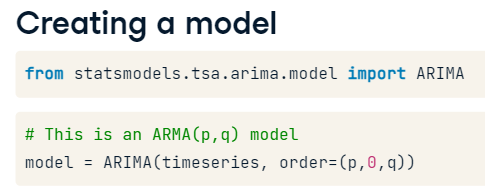

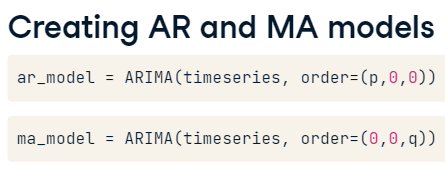

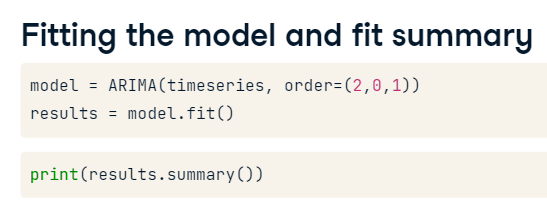

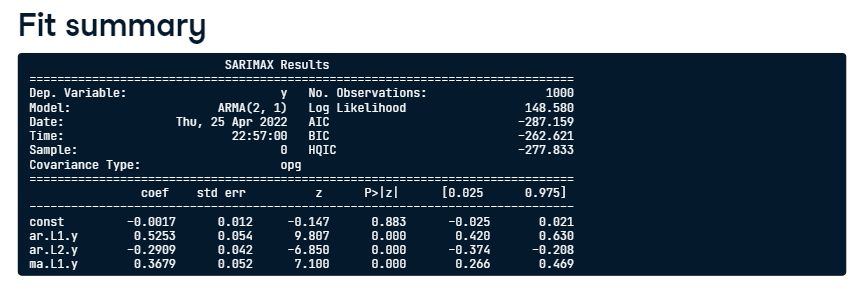

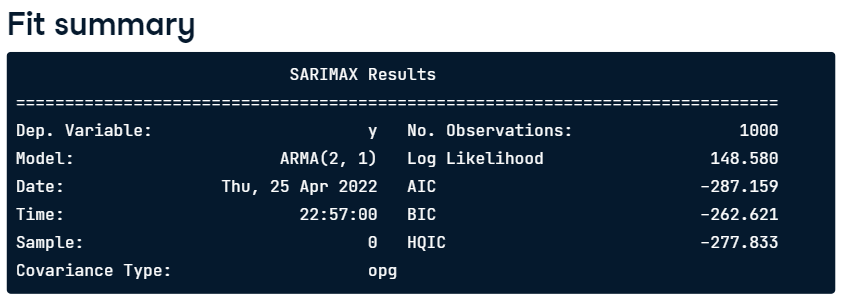



# ARMAX Model

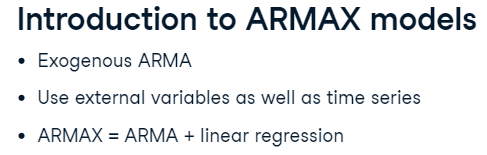

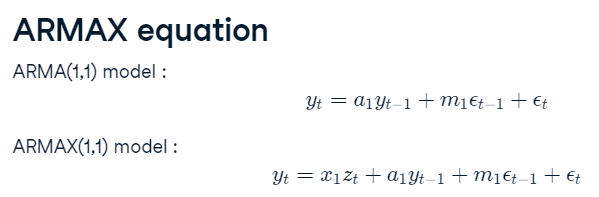

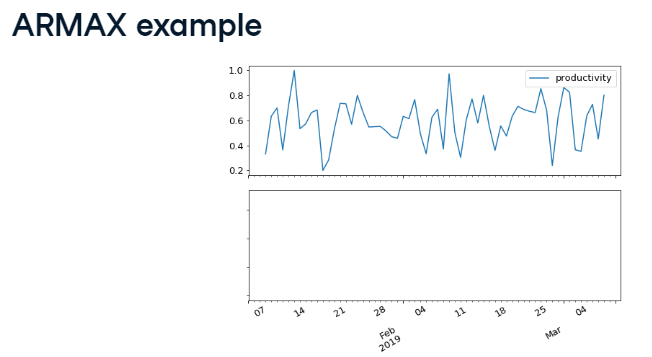

이전 일이 오늘 생산성에 영향을 미칠 수 있음. ARMAX는 외부변수를 하나 끌어오는건데 여기서 예시로든거는 수면시간 hours_sleep.

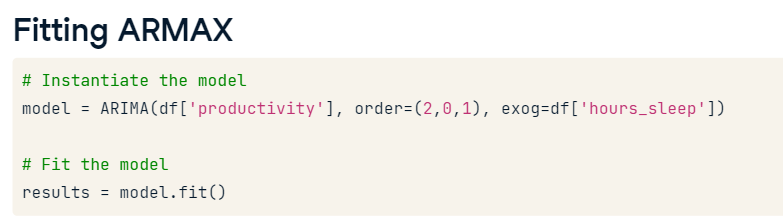

In [ ]:
# 퀴즈 1-1-1
# Instantiate the model
model = ARIMA(sample["timeseries_1"], order=(2,0,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

퀴즈 1-1-2

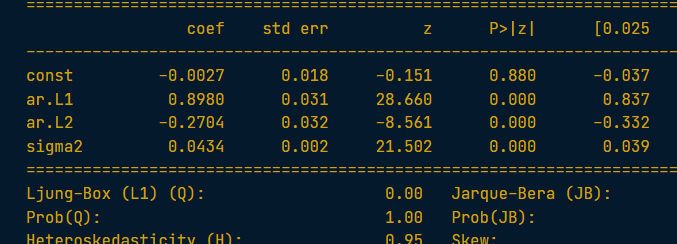

In [ ]:
#퀴즈 1-1-2
# ar의 coef가 0.89, -0.27이기에 coef list에는 부호를 반대로 한 값이 들어간다.
ar_coefs = [1,-0.9,0.3]
ma_coefs = [1]

In [ ]:
#퀴즈 1-1-3
# Instantiate the model
model = ARIMA(sample["timeseries_2"], order=(0,0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

퀴즈 1-1-4
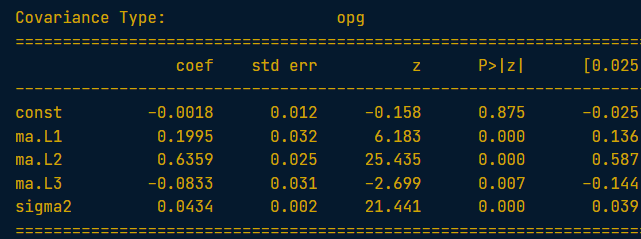

In [ ]:
# 퀴즈 1-1-4
# 통계적으로 유의한 coef가 ma 가 0.1995,0.6359,-0.0833으로
ar_coefs = [1]
ma_coefs = [1.0.2,0.6,-0.1]

In [ ]:
# 퀴즈 1-2
# 정상 시계열에대해 ARMA(3,1)을 원하니

# Instantiate the model
model = ARIMA(earthquake, order = (3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

In [ ]:
# 퀴즈 1-3
# Instantiate the model
model = ARIMA(hospital["wait_times_hrs"], order = (2,0,1), exog = hospital["nurse_count"])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())


# Predicting 예측

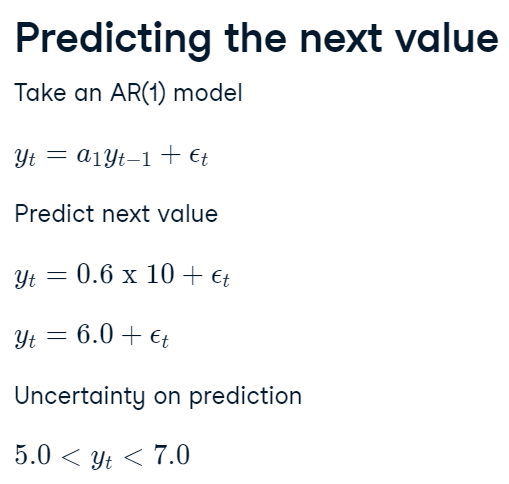

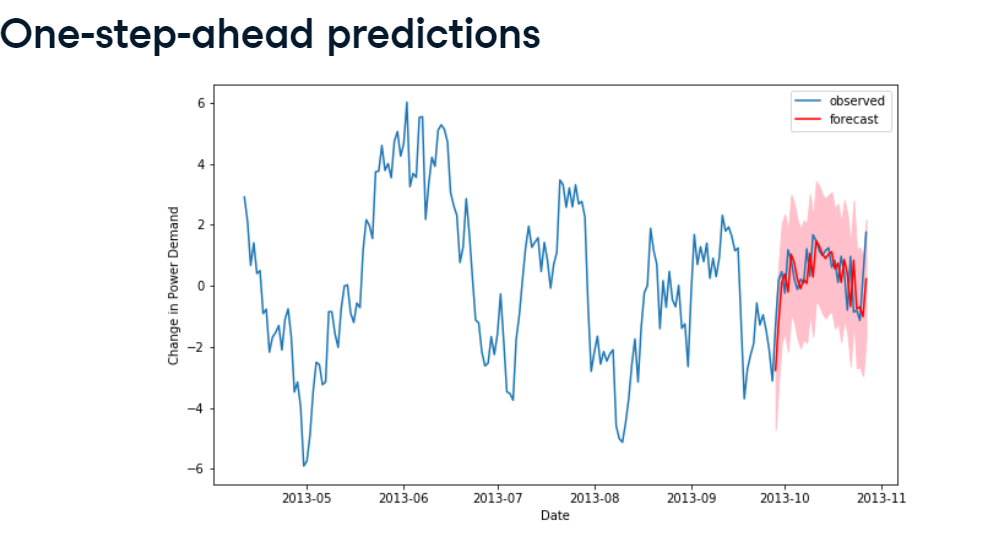
* One step ahead predictons으로 앞으로 하나으 ㅣ값을 예측하는데 얼마나 좋을지 평가. 평균 예측은 빨간 선으로 표시되고 불확실성의 범위는 음영 처리.

* Making one step ahead predictions
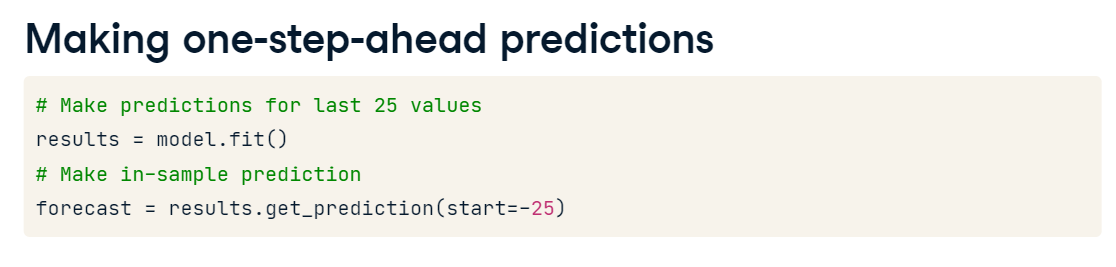
get_predictions에서 시작 매개변수 start로 몇 스텝 뒤로 물러나는지를 음의 정수로 설정. 여기서 -25면 훈련 데이터의 마지마 25개 항목에 대해 예측을 수행.

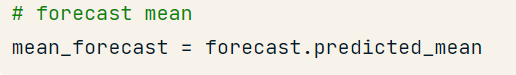
예측의 중심 값 mena_forecast.

예측의 상한 하한을 얻으려면??
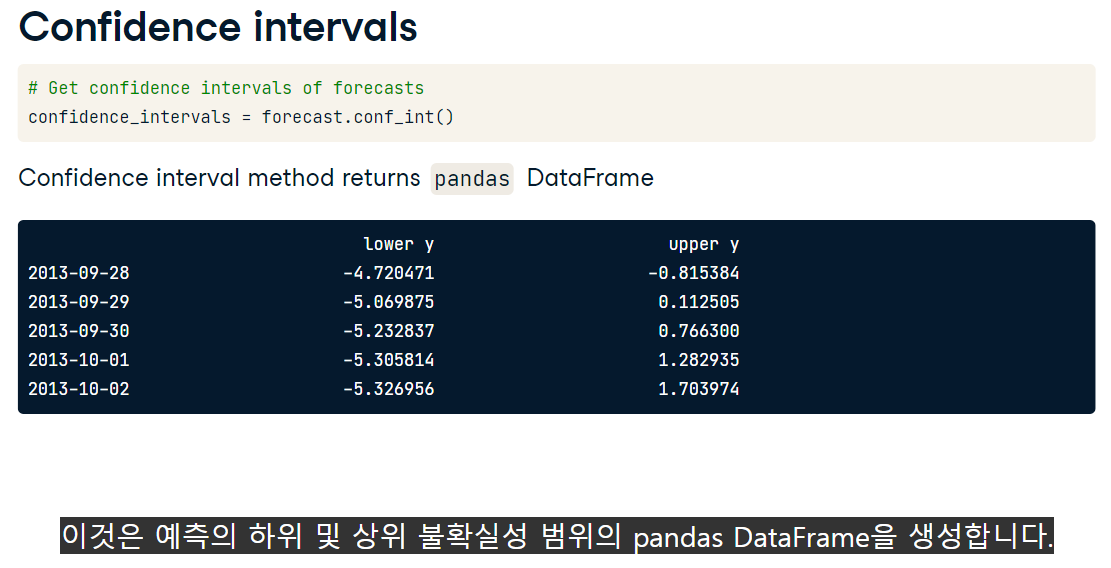

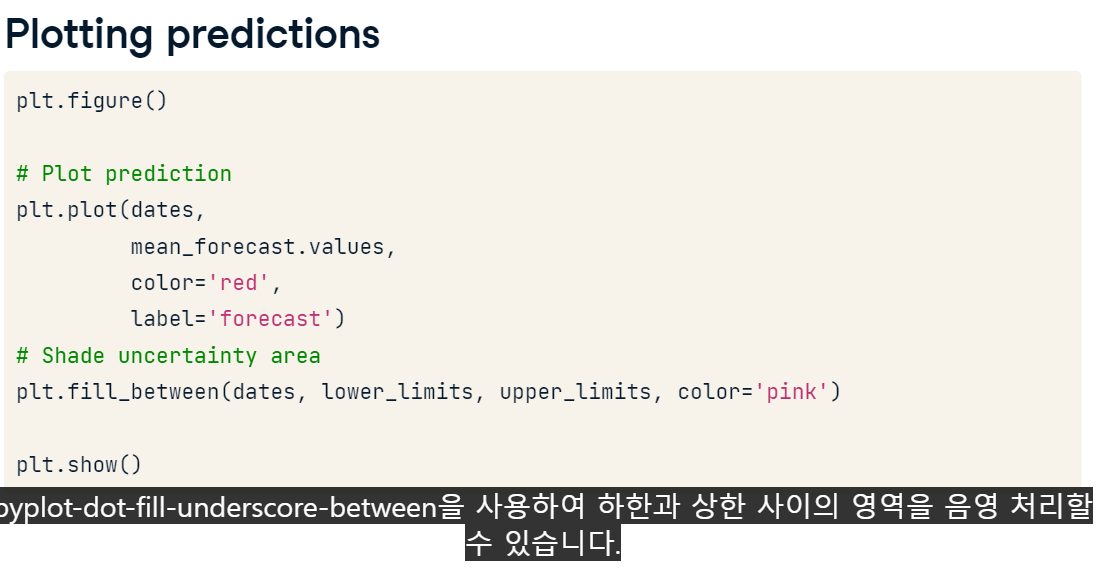
플롯으로 음영처리 가능.

# dynamic predictions 동적 예측
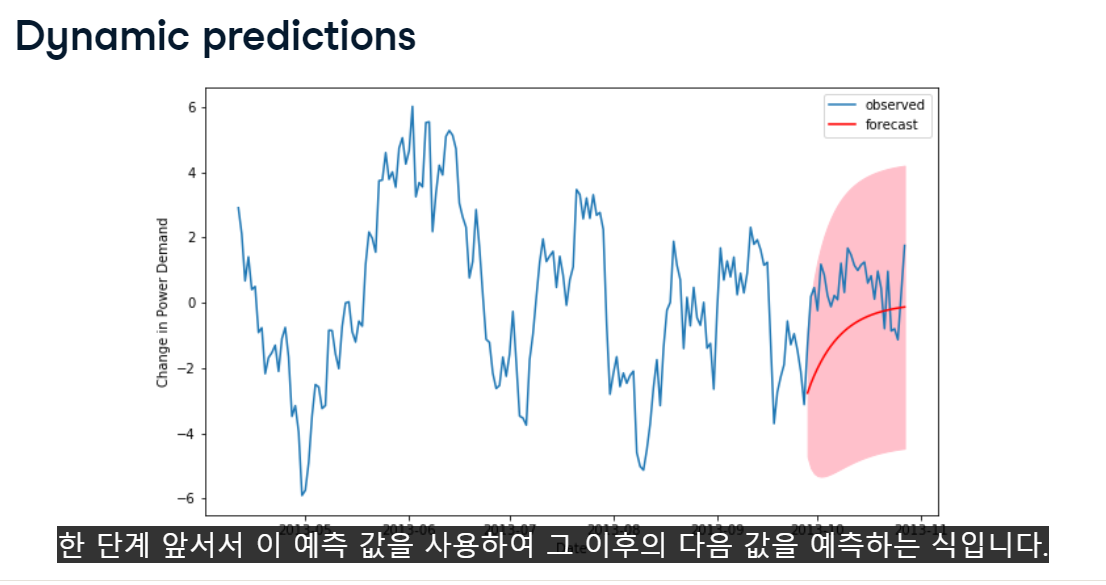

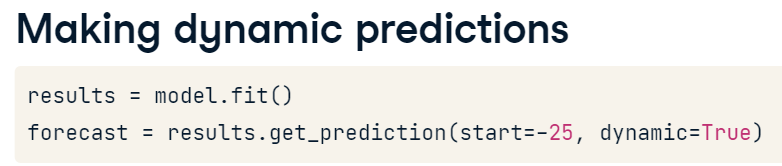
앞에서 한 get_predictions에서 dynamic = True로 설정.
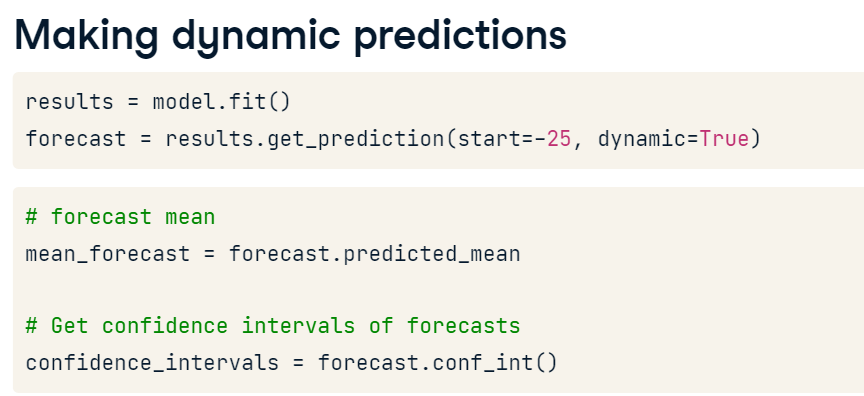

# Forecasting out of sample

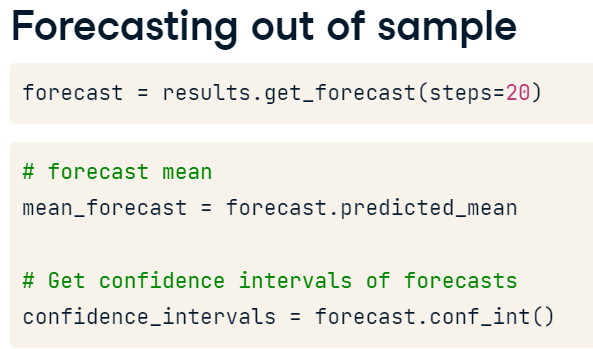


In [ ]:
# 퀴즈 2-1

# Generate predictions
one_step_forecast = results.get_prediction(start=-30)
# 최근 30개 데이터 포인트를 사용해 예측을 진행.

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

# date
# 2019-01-10    1648.654
# 2019-01-11    1658.188
# 2019-01-12    1635.154
# 2019-01-13    1606.231
# 2019-01-14    1595.914
# 2019-01-15    1624.776
# 2019-01-16    1682.115
# 2019-01-17    1673.497
# 2019-01-18    1692.070
# 2019-01-19    1690.669
# 2019-01-20    1674.287
# 2019-01-21    1659.196
# 2019-01-22    1641.150
# 2019-01-23    1631.465
# 2019-01-24    1643.412
# 2019-01-25    1656.734
# 2019-01-26    1670.881
# 2019-01-27    1681.201
# 2019-01-28    1670.494
# 2019-01-29    1627.220
# 2019-01-30    1591.729
# 2019-01-31    1697.754
# 2019-02-01    1709.919
# 2019-02-02    1596.200
# 2019-02-03    1590.991
# 2019-02-04    1598.336
# 2019-02-05    1633.817
# 2019-02-06    1666.078
# 2019-02-07    1632.984
# 2019-02-08    1607.137
# Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
#퀴즈 2-2

# print(amazon)
#               close
# date
# 2018-01-01  1172.39
# 2018-01-02  1189.01
# 2018-01-03  1204.20
# 2018-01-04  1209.59
# 2018-01-05  1229.14
# ...             ...
# 2019-02-04  1633.31
# 2019-02-05  1658.81
# 2019-02-06  1640.26
# 2019-02-07  1614.37
# 2019-02-08  1588.22

# [404 rows x 1 columns]


# plot the amazon data #실제 데이터
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions #예측 데이터
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits # CI에 대한 영역처리
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

2-2 Plot
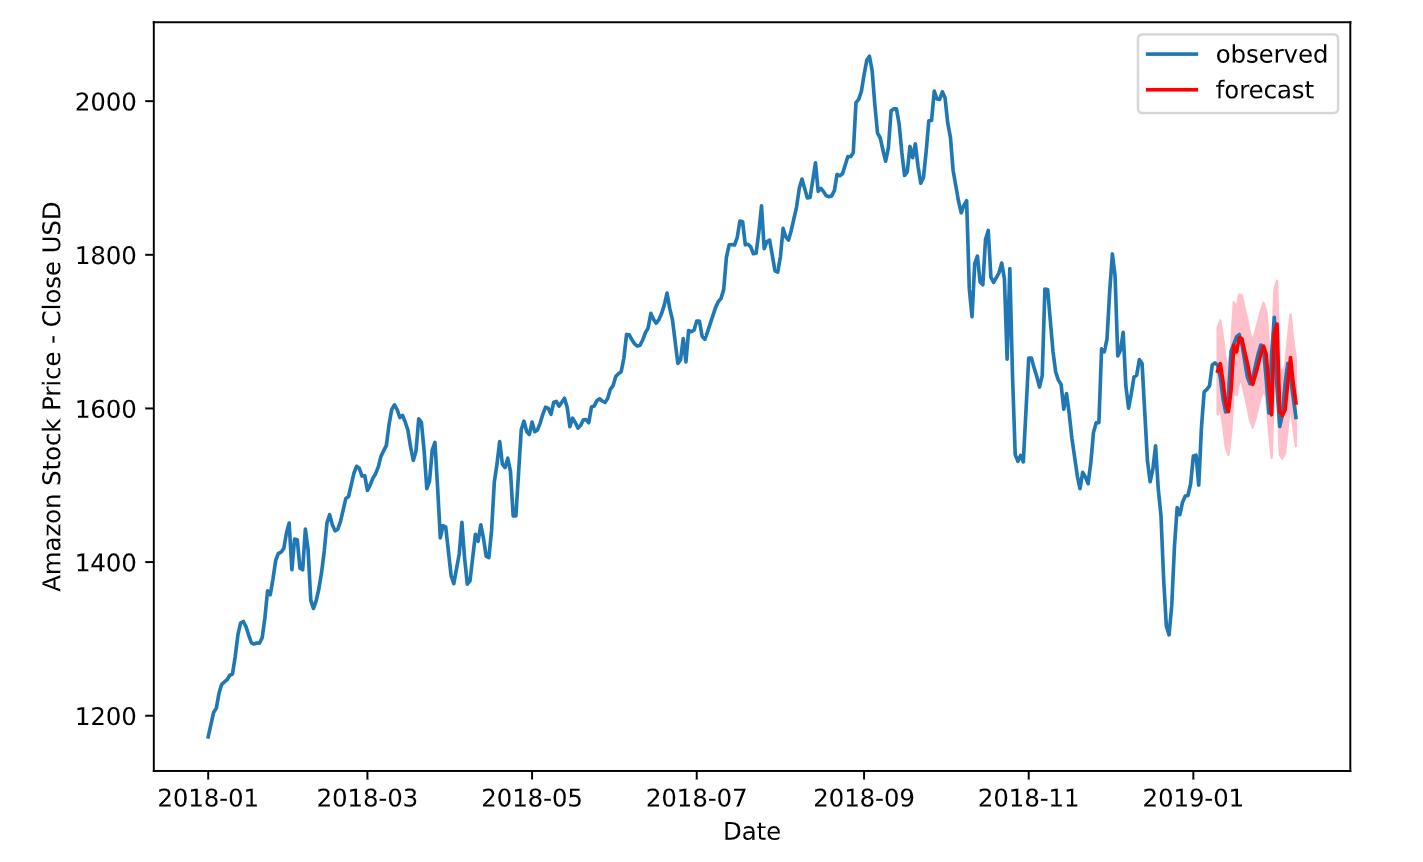

In [1]:
# 퀴즈 2-3

# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

# #결과
# date
#     2019-01-10    1648.654
#     2019-01-11    1648.760
#     2019-01-12    1649.121
#     2019-01-13    1645.696
#     2019-01-14    1643.132
#     2019-01-15    1642.731
#     2019-01-16    1641.575
#     2019-01-17    1639.998
#     2019-01-18    1636.858
#     2019-01-19    1634.462
#     2019-01-20    1632.864
#     2019-01-21    1631.466
#     2019-01-22    1629.813
#     2019-01-23    1628.476
#     2019-01-24    1627.479
#     2019-01-25    1627.215
#     2019-01-26    1626.839
#     2019-01-27    1626.335
#     2019-01-28    1625.900
#     2019-01-29    1625.649
#     2019-01-30    1625.387
#     2019-01-31    1625.100
#     2019-02-01    1624.649
#     2019-02-02    1624.297
#     2019-02-03    1624.043
#     2019-02-04    1623.817
#     2019-02-05    1623.574
#     2019-02-06    1623.374
#     2019-02-07    1623.215
#     2019-02-08    1623.139
#     Freq: D, Name: predicted_mean, dtype: float64

NameError: ignored

In [2]:
# 퀴즈 2-4

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

NameError: ignored

Dynamic Predictions 퀴즈 2-4 plot
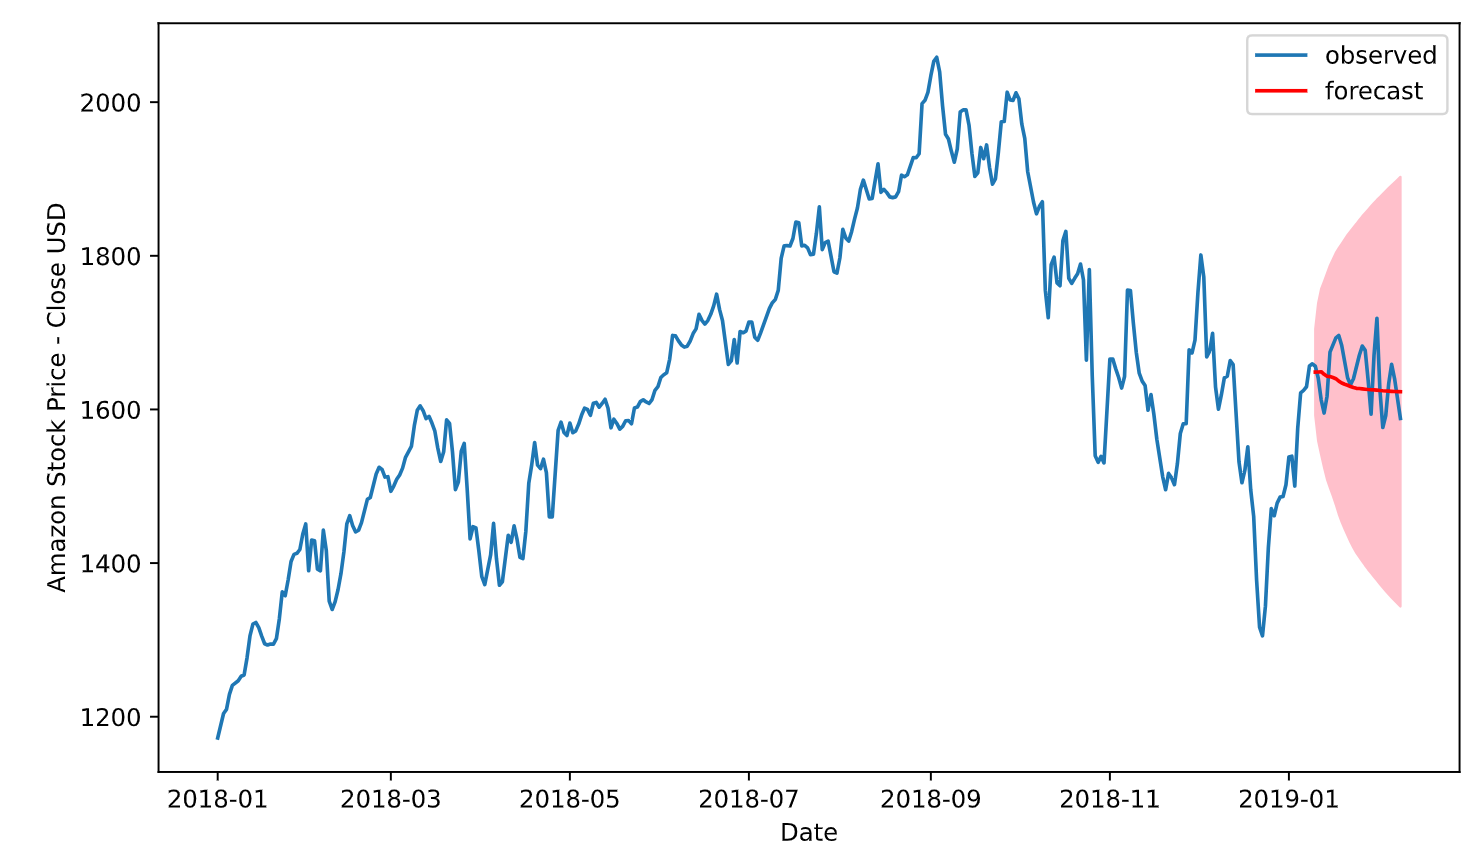

비정상성 시계열은 차분을 통해 정상 시계열로 만든 후, 분석과 예측을 하는데 우리가 알고싶은 건 원래 시계열에서의 값.
-> from numpy import cumsum을 활용.
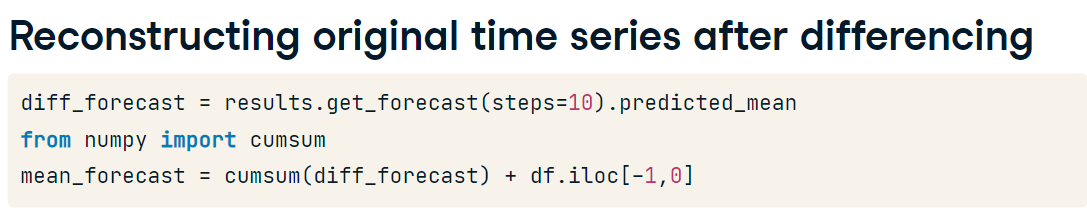

예측에 대한 불확실성도 맞게 바꿔야함.
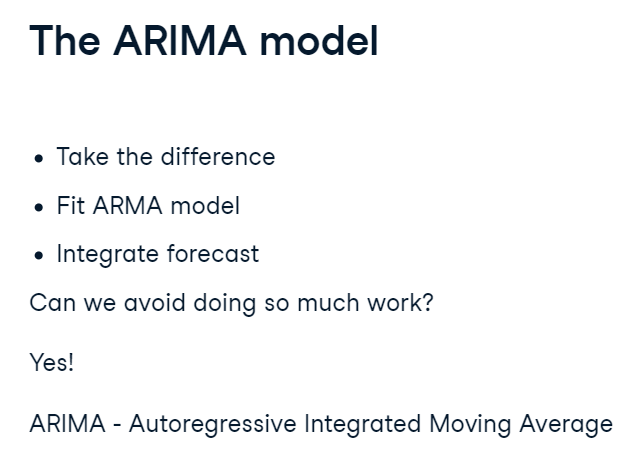

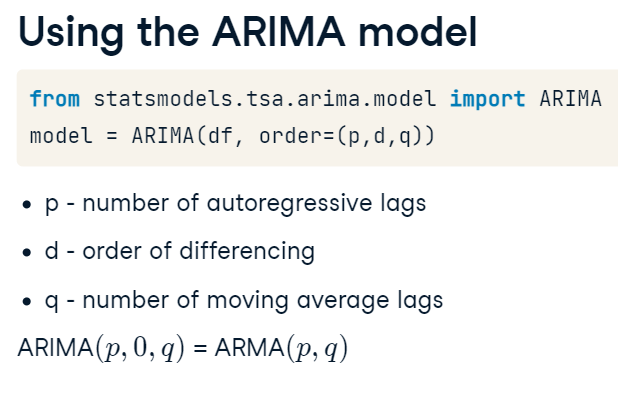

ARIMA(2,1,1)을 ARMA(2,1)로.

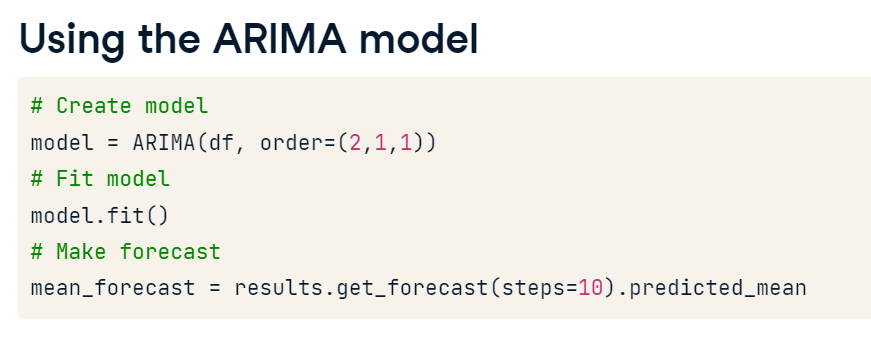

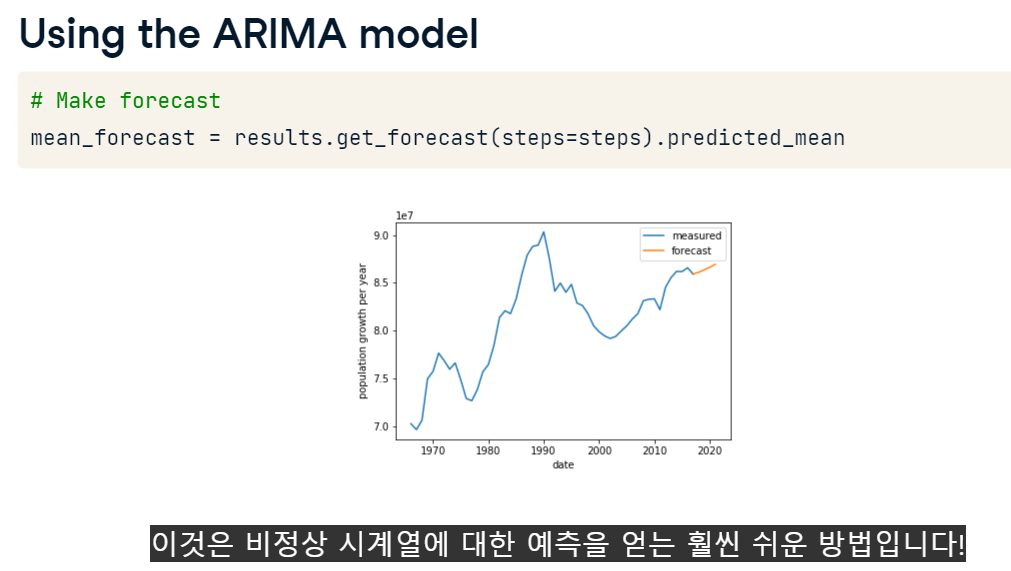

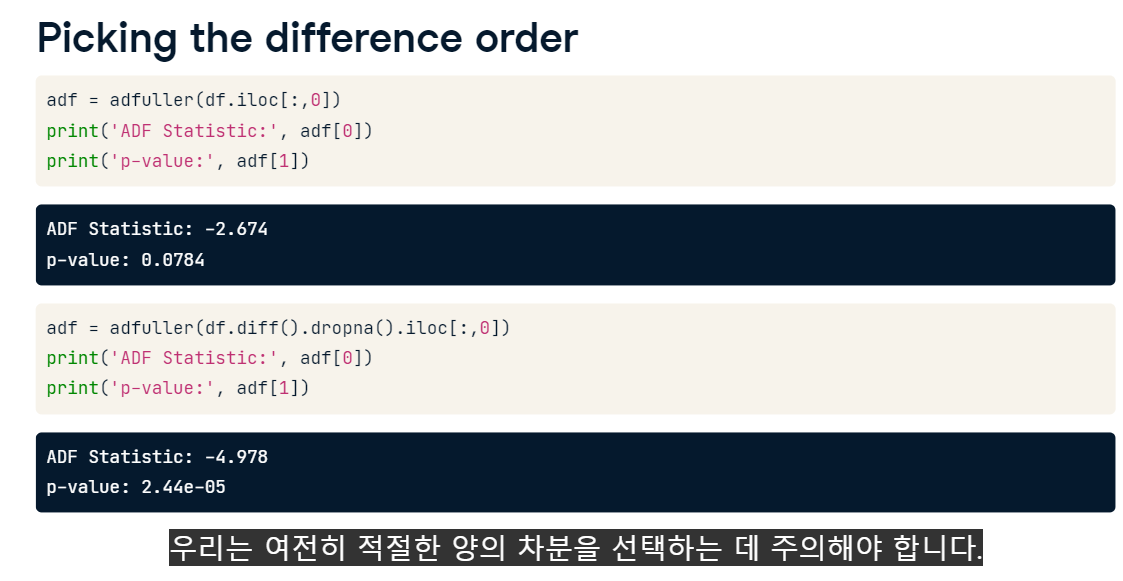

정상성을 만들때까지만 difference를 취한다. 이걸 위해 Dicky-Fuller 테스트를 활용. 그래야 여기서처럼 1번 차분한다는걸 알고난 후에 진행.




In [1]:
# 퀴즈 3-1

# Take the first difference of the data # 1차 차분한 이후, dropna를 실행하고 이를 활용해 ARMA(2,2)모델을 만듬.
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order = (2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

# <script.py> output:
#                                    SARIMAX Results
#     ==============================================================================
#     Dep. Variable:                  close   No. Observations:                 1258
#     Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
#     Date:                Fri, 18 Aug 2023   AIC                          11076.743
#     Time:                        07:33:09   BIC                          11107.566
#     Sample:                             0   HQIC                         11088.327
#                                    - 1258
#     Covariance Type:                  opg
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     const          0.9872      0.494      1.997      0.046       0.019       1.956
#     ar.L1         -0.1540      0.073     -2.120      0.034      -0.296      -0.012
#     ar.L2          0.7945      0.072     11.093      0.000       0.654       0.935
#     ma.L1          0.1362      0.067      2.020      0.043       0.004       0.268
#     ma.L2         -0.8457      0.066    -12.832      0.000      -0.975      -0.717
#     sigma2       386.6007      6.185     62.506      0.000     374.478     398.723
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              6883.29
#     Prob(Q):                              0.77   Prob(JB):                         0.00
#     Heteroskedasticity (H):              15.57   Skew:                            -0.35
#     Prob(H) (two-sided):                  0.00   Kurtosis:                        14.44
#     ===================================================================================

#     Warnings:
#     [1] Covariance matrix calculated using the outer product of gradients (complex-step)

NameError: ignored

In [2]:
# 퀴즈 3-2

# Make arma forecast of next 10 differences
# 앞으로 10 포인트의  difference의 값.
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# print(arma_diff_forecast)
# 1258    3.842
# 1259    2.149
# 1260    3.077
# 1261    1.588
# 1262    2.555
# 1263    1.223
# 1264    2.196
# 1265    0.988
# 1266    1.948
# 1267    0.840
# Name: predicted_mean, dtype: float64

# Integrate the difference forecast
from numpy import cumsum
arma_int_forecast = cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

# <script.py> output:
#     1258    1592.062
#     1259    1594.211
#     1260    1597.287
#     1261    1598.875
#     1262    1601.430
#     1263    1602.653
#     1264    1604.850
#     1265    1605.838
#     1266    1607.786
#     1267    1608.626
#     Name: predicted_mean, dtype: float64

NameError: ignored

In [3]:
# 퀴즈 3-3
# Create an ARIMA(2,1,2) model, using the ARIMA class, passing it the Amazon stocks data amazon.
# Fit the model.
# Make a forecast of mean values of the Amazon data for the next 10 time steps.
# Assign the result to arima_value_forecast.

# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order = (2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)



NameError: ignored

퀴즈 3-4
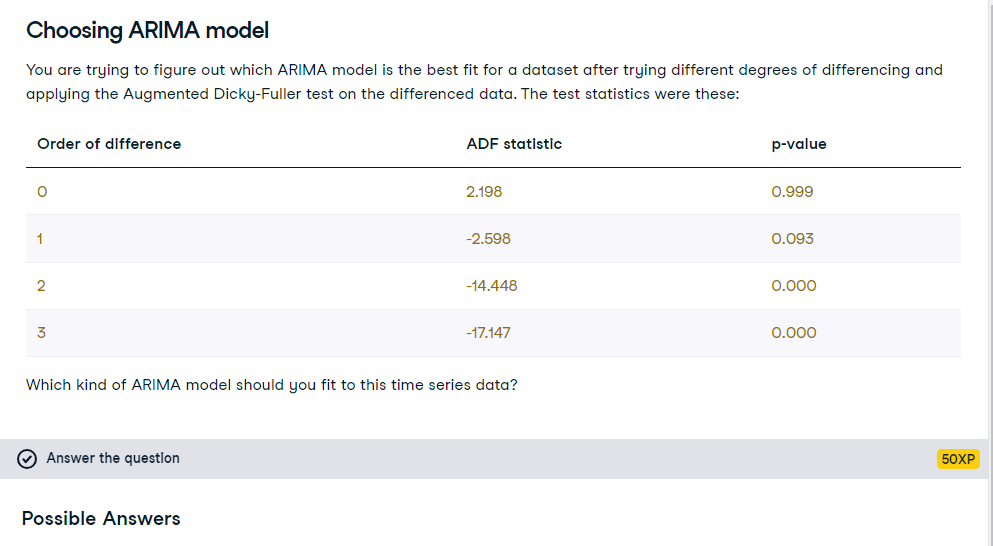

A. 차분 2번.